Sine funcion coefficients:
[0.53689141 1.02460733]
Covariance of coefficients:
[[ 4.26699093e-01 -1.32090090e-04]
 [-1.32090090e-04  2.95339062e-04]]


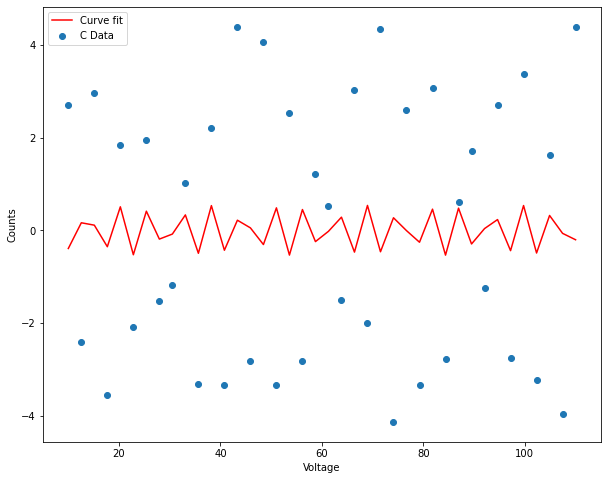

In [6]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit


data_filename = 'anglesweep.txt'
data_start = 2
V, C, D = np.loadtxt(data_filename , unpack=True, skiprows = data_start, delimiter = "\t", usecols =[0,3,4]) 

x = np.linspace(max(V),min(V), 40)

# y is another array which stores 3.45 times 
# the sine of (values in x) * 1.334.  
# The random.normal() draws random sample  
# from normal (Gaussian) distribution to make 
# them scatter across the base line 
y = 3.45 * np.sin(1.334 * x) + np.random.normal(size = 40) 

# Test function with coefficients as parameters 
def test(x, a, b): 
    return a * np.sin(b * x) 

# curve_fit() function takes the test-function 
# x-data and y-data as argument and returns  
# the coefficients a and b in param and 
# the estimated covariance of param in param_cov 
param, param_cov = curve_fit(test, x, y) 

print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
# ans stores the new y-data according to  
# the coefficients given by curve-fit() function 
ans = (param[0]*(np.sin(param[1]*x))) 


fig,ax=plt.subplots(figsize=(10,8))
ax.set_xlabel("Voltage")
ax.set_ylabel("Counts")
ax.scatter(x, y, label='C Data')
ax.plot(x, ans, color='red', label="Curve fit")
#ax.plot(V, test_func(V, params[0], params[1]),
    #   label='Fitted function')
#ax.set_ylim([(min(C)-10000), (max(C)+10000)])

plt.legend(loc='best')

plt.show()

